In [1]:
# - Aggregate data into one Data Frame using Pandas.
# - Standardizing header names
# - Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data
# - Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of complaints )
# - Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns
# - Removing duplicates
# - Replacing null values – Replace missing values with means of the column (for numerical columns)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer
pd.options.display.max_rows = 50

In [3]:
df1 = pd.read_csv('Data/file1.csv')
df2 = pd.read_csv('Data/file2.csv')
df3 = pd.read_csv('Data/file3.csv')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#function to count nan values:
def nan_counter(df):
    remaining_nan = {}

    for column in df.columns:

        remaining_nan[column] = df[column][df[column].isna() == True].size

    return remaining_nan

In [5]:
# function to count zero values:
def zero_counter(df):
    zeros = {}

    for column in df.columns:

        zeros =(df==0).sum()

    return zeros

In [6]:
# def unique_values(df):
#     for x in df:
#         print(x,':', len(df[x].unique()))

In [7]:
# unique_values(X_categ)

In [8]:
# Lets make a function to Capitalize letters for columns
def column_name_capitalize (df):
    df.columns = df.columns.str.upper()
    return df

In [9]:
#Lets invoke function for each df 
column_name_capitalize(df1)
column_name_capitalize(df2)
column_name_capitalize(df3)

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,EDUCATION,GENDER,INCOME,MONTHLY PREMIUM AUTO,NUMBER OF OPEN COMPLAINTS,POLICY TYPE,TOTAL CLAIM AMOUNT,VEHICLE CLASS
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [10]:
# Check
df1

,CUSTOMER,ST,GENDER,EDUCATION,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,NUMBER OF OPEN COMPLAINTS,POLICY TYPE,VEHICLE CLASS,TOTAL CLAIM AMOUNT
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df2

,CUSTOMER,ST,GENDER,EDUCATION,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,NUMBER OF OPEN COMPLAINTS,TOTAL CLAIM AMOUNT,POLICY TYPE,VEHICLE CLASS
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.600000,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.200000,Special Auto,SUV
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,537.600000,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,1027.200000,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,451.200000,Corporate Auto,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,847141.75%,63513,70,1/0/00,185.667213,Personal Auto,Four-Door Car
992,BS91566,Arizona,F,College,543121.91%,58161,68,1/0/00,140.747286,Corporate Auto,Four-Door Car
993,IL40123,Nevada,F,College,568964.41%,83640,70,1/0/00,471.050488,Corporate Auto,Two-Door Car
994,MY32149,California,F,Master,368672.38%,0,96,1/0/00,28.460568,Personal Auto,Two-Door Car


In [12]:
df1

,CUSTOMER,ST,GENDER,EDUCATION,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,NUMBER OF OPEN COMPLAINTS,POLICY TYPE,VEHICLE CLASS,TOTAL CLAIM AMOUNT
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Lets rename the columns 
def rename_columns(df, oldn, newn):
    return df.rename(columns = {oldn:newn}, inplace=True)

In [14]:
rename_columns(df1,'ST', 'STATE')


In [15]:
rename_columns(df2,'ST', 'STATE')


In [16]:
#Lets make a function to rearrange columns 
def rearrange_col(df, new_column_names):
    df = df[new_column_names]
    return df

In [17]:
new_column_names = list(df1.columns)

In [18]:
df2 = rearrange_col(df2, new_column_names)


In [19]:
df3 = rearrange_col(df3, new_column_names)


In [20]:
df2

,CUSTOMER,STATE,GENDER,EDUCATION,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,NUMBER OF OPEN COMPLAINTS,POLICY TYPE,VEHICLE CLASS,TOTAL CLAIM AMOUNT
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,Personal Auto,Four-Door Car,633.600000
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,Special Auto,SUV,547.200000
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,Personal Auto,Two-Door Car,537.600000
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,Personal Auto,Luxury Car,1027.200000
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,Corporate Auto,Two-Door Car,451.200000
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,847141.75%,63513,70,1/0/00,Personal Auto,Four-Door Car,185.667213
992,BS91566,Arizona,F,College,543121.91%,58161,68,1/0/00,Corporate Auto,Four-Door Car,140.747286
993,IL40123,Nevada,F,College,568964.41%,83640,70,1/0/00,Corporate Auto,Two-Door Car,471.050488
994,MY32149,California,F,Master,368672.38%,0,96,1/0/00,Personal Auto,Two-Door Car,28.460568


In [21]:
# Joining dataframes
Mu = pd.concat([df1, df2, df3])

In [22]:
# function to drop the column
def drop_col(df, column_name):
    Mu.drop(columns=[column_name], inplace=True)
    return df

In [23]:
#Lets drop Customer column initiating the function
drop_col(Mu, 'CUSTOMER')

,STATE,GENDER,EDUCATION,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,NUMBER OF OPEN COMPLAINTS,POLICY TYPE,VEHICLE CLASS,TOTAL CLAIM AMOUNT
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [24]:
#Removing % symbol
Mu['CUSTOMER LIFETIME VALUE'] = Mu['CUSTOMER LIFETIME VALUE'].replace({'%':''}, regex = True)

In [25]:
#converting type to numeric
Mu['CUSTOMER LIFETIME VALUE'] = pd.to_numeric(Mu['CUSTOMER LIFETIME VALUE'], errors = 'coerce')




In [26]:
#counting empty values in the column
Mu['CUSTOMER LIFETIME VALUE'].isna().sum()

2944

In [27]:
#Counting special values in the column
Mu['NUMBER OF OPEN COMPLAINTS'].str.contains('1/0/00').sum() 

1626

In [28]:
# converting Gender values to uppercase 
Mu['GENDER'].str.upper()
Mu['GENDER'].str.contains('NaN').sum()

0

In [29]:
Mu['GENDER'].unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [30]:
# def replace_value(df_column,old_phrase, new_phrase ):
#     df_column.replace(old_phrase, new_phrase, regex = True)
#     return df_column

In [31]:
Mu['NUMBER OF OPEN COMPLAINTS'] = Mu['NUMBER OF OPEN COMPLAINTS'].replace('1/0/00', 0 , regex=True)
    

In [32]:
Mu['NUMBER OF OPEN COMPLAINTS'].unique()

array([0, '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan, 2, 3, 1,
       5, 4], dtype=object)

In [33]:
# Replacing unique values
Mu['NUMBER OF OPEN COMPLAINTS'] = Mu['NUMBER OF OPEN COMPLAINTS'].replace('1/2/00', 2 , regex=True)

In [34]:
Mu['NUMBER OF OPEN COMPLAINTS'] = Mu['NUMBER OF OPEN COMPLAINTS'].replace('1/3/00', 3 , regex=True)

In [35]:
Mu['NUMBER OF OPEN COMPLAINTS'] = Mu['NUMBER OF OPEN COMPLAINTS'].replace('1/5/00', 5 , regex=True)

In [36]:
Mu['NUMBER OF OPEN COMPLAINTS'] = Mu['NUMBER OF OPEN COMPLAINTS'].replace('1/4/00', 4 , regex=True)

In [37]:
Mu['NUMBER OF OPEN COMPLAINTS'] = Mu['NUMBER OF OPEN COMPLAINTS'].replace('1/1/00', 1 , regex=True)

In [38]:
# Mu['GENDER'] = Mu['GENDER'].str.upper()

In [39]:
Mu['GENDER'].unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [40]:
# Mu['GENDER']=Mu['GENDER'].fillna(value="N/A")

In [42]:
# dataframe['Monthly Premium Auto'].unique()

NameError: name 'dataframe' is not defined

In [ ]:
Mu['GENDER'] = Mu['GENDER'].replace({'Femal':'F', 'female': 'F', 'Male': 'M'})

In [ ]:
Mu['GENDER'].value_counts()

In [ ]:
# def change_str_country(df_column):
#     for i in df_column:
#             if i.startswith('A'):
#                 return 'Arizona'
#             elif i.startswith('W'):
#                 return 'Washington'
#             elif i.startswith('C'):
#                 return 'California'
#             elif i == "N":
#                 return 'Nevada'
#             elif i.startswith('O'):
#                 return 'Oregon'
#             else:
#                 return i
           

In [ ]:
#Mu['STATE'] =list(map(change_str_country, Mu['STATE'] ))

In [ ]:
Mu.head()

In [ ]:

Mu['CUSTOMER LIFETIME VALUE'] = round(Mu['CUSTOMER LIFETIME VALUE'], 2)
Mu.head()

In [43]:
Mu['STATE'] = Mu['STATE'].replace({'Cali':'California', 'AZ': 'Arizona', 'WA': 'Washington'})

In [44]:
Mu['STATE'].value_counts(dropna=False)

California    3152
NaN           2937
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: STATE, dtype: int64

In [45]:
# Replacing values
Mu['EDUCATION'] = Mu['EDUCATION'].replace({'Bachelor':'Bachelors'})

In [46]:
Mu['TOTAL CLAIM AMOUNT'] = Mu['TOTAL CLAIM AMOUNT'].round(2)

In [47]:
Mu = Mu.drop_duplicates()

In [48]:
Mu['GENDER'].value_counts(dropna=False)

F         4433
M         4235
NaN        123
Male        40
female      30
Femal       17
Name: GENDER, dtype: int64

In [49]:
# fill empty values with mean
Mu['INCOME'].fillna(np.mean(Mu['INCOME']), inplace=True)

C:\Users\Seinf\Anaconda3\envs\DAenv\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [50]:
Mu['MONTHLY PREMIUM AUTO'].fillna(np.mean(Mu['MONTHLY PREMIUM AUTO']), inplace=True)

In [51]:
Mu['MONTHLY PREMIUM AUTO']=round(Mu['MONTHLY PREMIUM AUTO'])

C:\Users\Seinf\AppData\Local\Temp/ipykernel_10348/2076000758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mu['MONTHLY PREMIUM AUTO']=round(Mu['MONTHLY PREMIUM AUTO'])


In [52]:
Mu['TOTAL CLAIM AMOUNT'].fillna(np.mean(Mu['TOTAL CLAIM AMOUNT']), inplace=True)

In [53]:
Mu['TOTAL CLAIM AMOUNT'].value_counts()

316.80    112
292.80    109
312.00    105
331.20    102
321.60    100
         ... 
623.53      1
468.49      1
677.62      1
89.92       1
790.78      1
Name: TOTAL CLAIM AMOUNT, Length: 4913, dtype: int64

In [54]:
# making all strings in the dataframe lower-case
Mu=Mu.applymap(lambda s: s.lower() if type(s)==str else s)

In [55]:
#adding a dictionary which links STATE and REGION values
region_dict = {'california': 'west region', 'oregon' : 'north west', 'washington': 'east', 'arizona' : 'central', 'nevada': 'central'}
#adding a new column REGION as a categorigal variable mapped with STATE
Mu['REGION'] = Mu['STATE'].map(region_dict)
Mu

,STATE,GENDER,EDUCATION,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,NUMBER OF OPEN COMPLAINTS,POLICY TYPE,VEHICLE CLASS,TOTAL CLAIM AMOUNT,REGION
0,washington,NaN,master,NaN,0.0,1000.0,0.0,personal auto,four-door car,2.70,east
1,arizona,f,bachelors,6.979536e+05,0.0,94.0,0.0,personal auto,four-door car,1131.46,central
2,nevada,f,bachelors,1.288743e+06,48767.0,108.0,0.0,personal auto,two-door car,566.47,central
3,california,m,bachelors,7.645862e+05,0.0,106.0,0.0,corporate auto,suv,529.88,west region
4,washington,m,high school or below,5.363077e+05,36357.0,68.0,0.0,personal auto,four-door car,17.27,east
...,...,...,...,...,...,...,...,...,...,...,...
7065,california,m,bachelors,2.340599e+04,71941.0,73.0,0.0,personal auto,four-door car,198.23,west region
7066,california,f,college,3.096511e+03,21604.0,79.0,0.0,corporate auto,four-door car,379.20,west region
7067,california,m,bachelors,8.163890e+03,0.0,85.0,3.0,corporate auto,four-door car,790.78,west region
7068,california,m,college,7.524442e+03,21941.0,96.0,0.0,personal auto,four-door car,691.20,west region


In [56]:
Mu.columns

Index(['STATE', 'GENDER', 'EDUCATION', 'CUSTOMER LIFETIME VALUE', 'INCOME',
       'MONTHLY PREMIUM AUTO', 'NUMBER OF OPEN COMPLAINTS', 'POLICY TYPE',
       'VEHICLE CLASS', 'TOTAL CLAIM AMOUNT', 'REGION'],
      dtype='object')

In [57]:
#rearranging columns
Mu = Mu[['REGION', 'STATE', 'GENDER', 'EDUCATION',
       'CUSTOMER LIFETIME VALUE', 'INCOME', 'MONTHLY PREMIUM AUTO',
       'NUMBER OF OPEN COMPLAINTS', 'POLICY TYPE', 'VEHICLE CLASS',
       'TOTAL CLAIM AMOUNT']]

In [58]:
Mu

,REGION,STATE,GENDER,EDUCATION,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,NUMBER OF OPEN COMPLAINTS,POLICY TYPE,VEHICLE CLASS,TOTAL CLAIM AMOUNT
0,east,washington,NaN,master,NaN,0.0,1000.0,0.0,personal auto,four-door car,2.70
1,central,arizona,f,bachelors,6.979536e+05,0.0,94.0,0.0,personal auto,four-door car,1131.46
2,central,nevada,f,bachelors,1.288743e+06,48767.0,108.0,0.0,personal auto,two-door car,566.47
3,west region,california,m,bachelors,7.645862e+05,0.0,106.0,0.0,corporate auto,suv,529.88
4,east,washington,m,high school or below,5.363077e+05,36357.0,68.0,0.0,personal auto,four-door car,17.27
...,...,...,...,...,...,...,...,...,...,...,...
7065,west region,california,m,bachelors,2.340599e+04,71941.0,73.0,0.0,personal auto,four-door car,198.23
7066,west region,california,f,college,3.096511e+03,21604.0,79.0,0.0,corporate auto,four-door car,379.20
7067,west region,california,m,bachelors,8.163890e+03,0.0,85.0,3.0,corporate auto,four-door car,790.78
7068,west region,california,m,college,7.524442e+03,21941.0,96.0,0.0,personal auto,four-door car,691.20


<h1> Activity 3 4 5 </h1>

In [59]:
dataframe=pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv')

In [60]:
dataframe.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [61]:
#converting Date column to datatype
dataframe['Date'] = pd.to_datetime(dataframe['Effective To Date'])
#fetching 'the month' by index
dataframe['Date'] = pd.DatetimeIndex(dataframe['Date']).month
# filter does not work dataframe['Date'] = dataframe[(dataframe.Date > 3)]  

dataframe.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Date
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1


In [62]:
#splitting df to df with discreet values
categorical = dataframe.select_dtypes(include=['object'])



In [63]:
#splitting df to df with numerical values
numerical = dataframe.select_dtypes(include=['number'])





In [64]:
numerical

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Date
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


In [65]:
numerical.drop('Date', axis=1, inplace=True)


C:\Users\Seinf\Anaconda3\envs\DAenv\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
numerical

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [67]:
#creating plots for all numerical datasets
# sns.pairplot(numerical.iloc[:,1:]) #commented due to loading time

<AxesSubplot:>

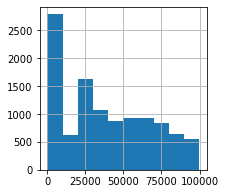

In [68]:
dataframe['Income'].hist(figsize=(3,3))

(array([2787.,  632., 1632., 1070.,  881.,  938.,  931.,  834.,  649.,
         556.]),
 array([    0. ,  9998.1, 19996.2, 29994.3, 39992.4, 49990.5, 59988.6,
        69986.7, 79984.8, 89982.9, 99981. ]),
 <BarContainer object of 10 artists>)

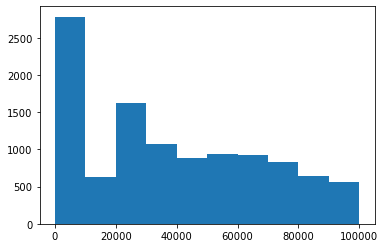

In [69]:
plt.hist(dataframe['Income'])

(array([5337., 5573.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

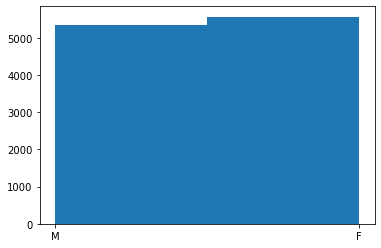

In [70]:
plt.hist(dataframe['Gender'], bins = 2)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Monthly Premium Auto'}>,
        <AxesSubplot:title={'center':'Months Since Last Claim'}>,
        <AxesSubplot:title={'center':'Months Since Policy Inception'}>],
       [<AxesSubplot:title={'center':'Number of Open Complaints'}>,
        <AxesSubplot:title={'center':'Number of Policies'}>,
        <AxesSubplot:title={'center':'Total Claim Amount'}>]],
      dtype=object)

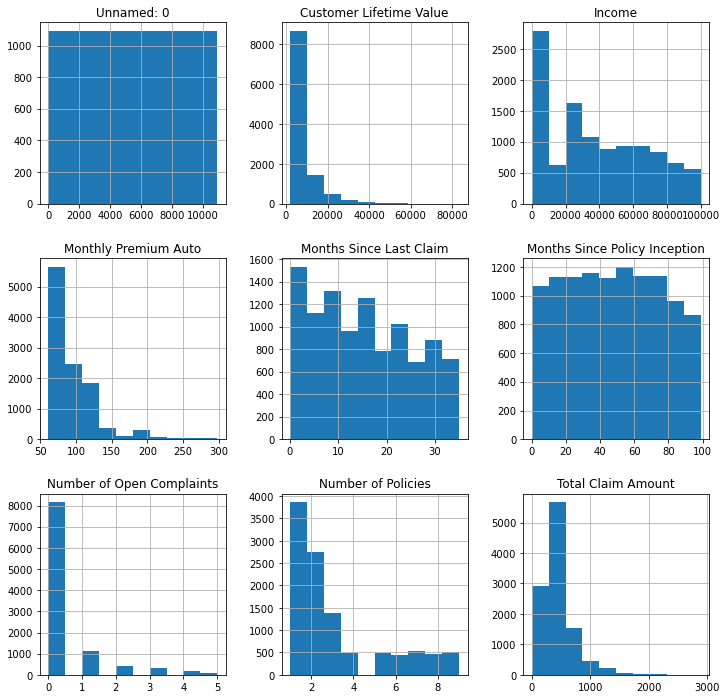

In [71]:
numerical.hist(figsize=(12,12))

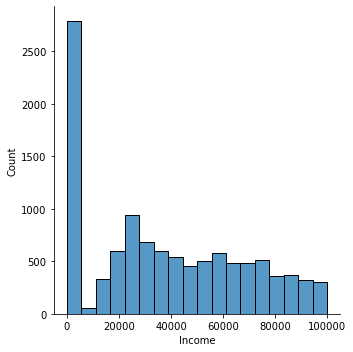

In [72]:
sns.displot(dataframe['Income'])

In [73]:
#function for distribution plots for all columns in the numerical dataframe
def create_distribution_plots(numerical):
    plt.figure(figsize = (18,12))
    for i, col in enumerate(numerical.iloc[:,1:], 1):
        plt.subplot(3,4,i)
        sns.distplot(numerical[col])

C:\Users\Seinf\Anaconda3\envs\DAenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Seinf\Anaconda3\envs\DAenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Seinf\Anaconda3\envs\DAenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

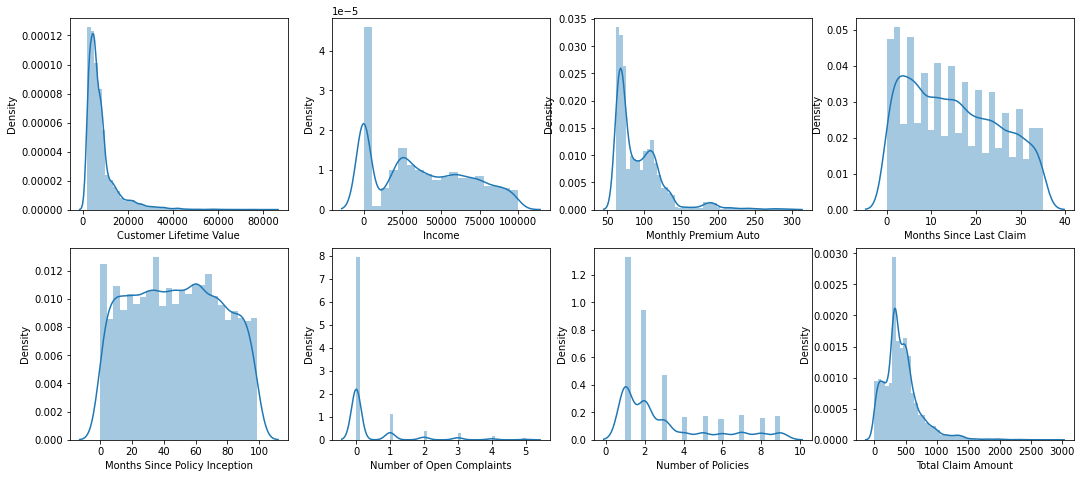

In [74]:
create_distribution_plots(numerical)

In [75]:
corr_matrix=numerical.corr() #correlation matrix
# upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool)
# [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.5)]

In [76]:
# corr = numerical.corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# with sns.axes_style("white"):
#     f, ax = plt.subplots(figsize=(9, 7))
#     ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [77]:
# numerical.drop(["Monthly Premium Auto"],axis=1,inplace=True)



In [78]:
def show_heatmap(datafr):
    figs, axs = plt.subplots(figsize = (9,9))
    axs.set_title("Correlation Heatmap")
    sns.heatmap(datafr, 
               annot=True,
               cmap = 'seismic',
               center = 0)


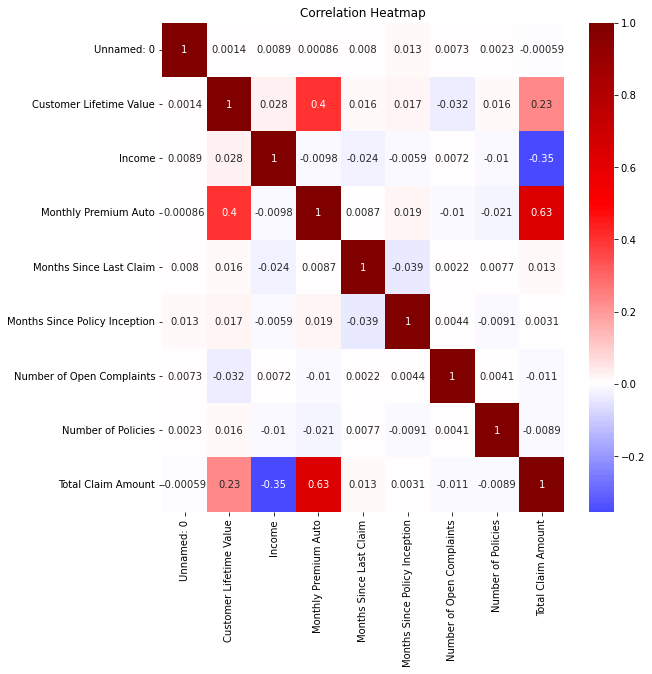

In [79]:
show_heatmap(corr_matrix)

In [80]:
categorical.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

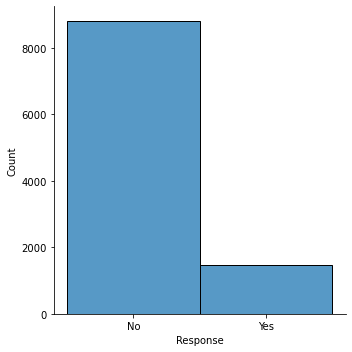

In [81]:
sns.displot(categorical['Response'], kind="hist")

In [82]:
plt.figure(figsize=(14,8))
# sns.pairplot(x=categorical['Response'], y=categorical['Sales Channel'] ,)
# sns.barplot(x=categorical['Response'], y=categorical['Sales Channel'] ) 
# check Titanik  example 

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

In [83]:
#store bin values in a variable
responses = categorical['Response'].value_counts()
responses

No     8813
Yes    1466
Name: Response, dtype: int64

Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

<BarContainer object of 2 artists>

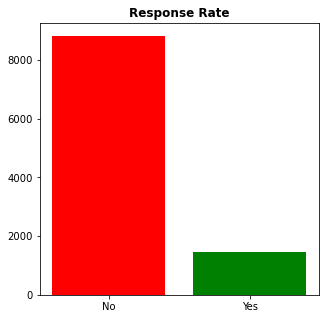

In [84]:
# create figure and axes
fig, ax = plt.subplots(figsize = (5,5))
# set title
ax.set_title('Response Rate', fontweight='bold')
# plot the bar chart
ax.bar(responses.index, responses, color=('red','green'))

In [85]:
sales = categorical['Sales Channel'].value_counts()
sales
dataframe.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type', 'Date'],
      dtype='object')

In [86]:
dataframe['Customer'].unique()

array(['DK49336', 'KX64629', 'LZ68649', ..., 'KX53892', 'TL39050',
       'WA60547'], dtype=object)

In [87]:
#ax1 = sns.countplot(x="Sales Channel", data=categorical)

In [88]:
#preparing to make 3 plots BY Response
response_by = dataframe.groupby(['Sales Channel', 'Income'])['Response'].count().reset_index()
response_by

,Sales Channel,Income,Response
0,Agent,0,1016
1,Agent,10269,1
2,Agent,10275,1
3,Agent,10312,7
4,Agent,10334,2
...,...,...,...
5836,Web,99364,1
5837,Web,99368,1
5838,Web,99553,1
5839,Web,99934,1


In [89]:
# CLEAN DATA !!! 

In [90]:
#preparing the bar chart
sns.set_palette('RdYlGn')
palette_alive = {"yes": "C5", "no": "C0"}

In [91]:
# fig2, ax2 = plt.subplots(figsize = (12,8))
# ax2.set_title('Response Rate by class', size='25', fontweight='bold')

# sns.barplot(x = response_by['Response'],y = response_by['Sales Channel'], hue = response_by['Income'], ax1 = ax2, palette=palette_alive)


#1. X/Y Split target = total claim amoun
#2. Normalize numerical data (optional)
-- categorical regression can do later
#3. Splitting the data x_train, y_train and check the data with the model (MSE RMSE)
#4. Standartize the data
#5. Linear Regression



<h2> Data Cleaning </h2>

In [92]:
def drop_column(dataframe,column_name):
    dataframe.drop(columns=[column_name], inplace=True)
    return dataframe

In [93]:
drop_column(dataframe,'Unnamed: 0')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Date
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [95]:
dataframe['Customer Lifetime Value'] = dataframe['Customer Lifetime Value'].round(2)
dataframe['Total Claim Amount'] = dataframe['Total Claim Amount'].round(2)

In [96]:
nan_value = float("NaN")
dataframe["Income"].replace(0, nan_value, inplace=True)

In [97]:
#X_numeric['income_transformed'].fillna(value=X_numeric['income_transformed'].mean(), inplace=True)

In [98]:
# dataframe.fillna(value=dataframe.mean(), inplace = True)

Text(0.5, 1.0, 'Months Since Policy Inception')

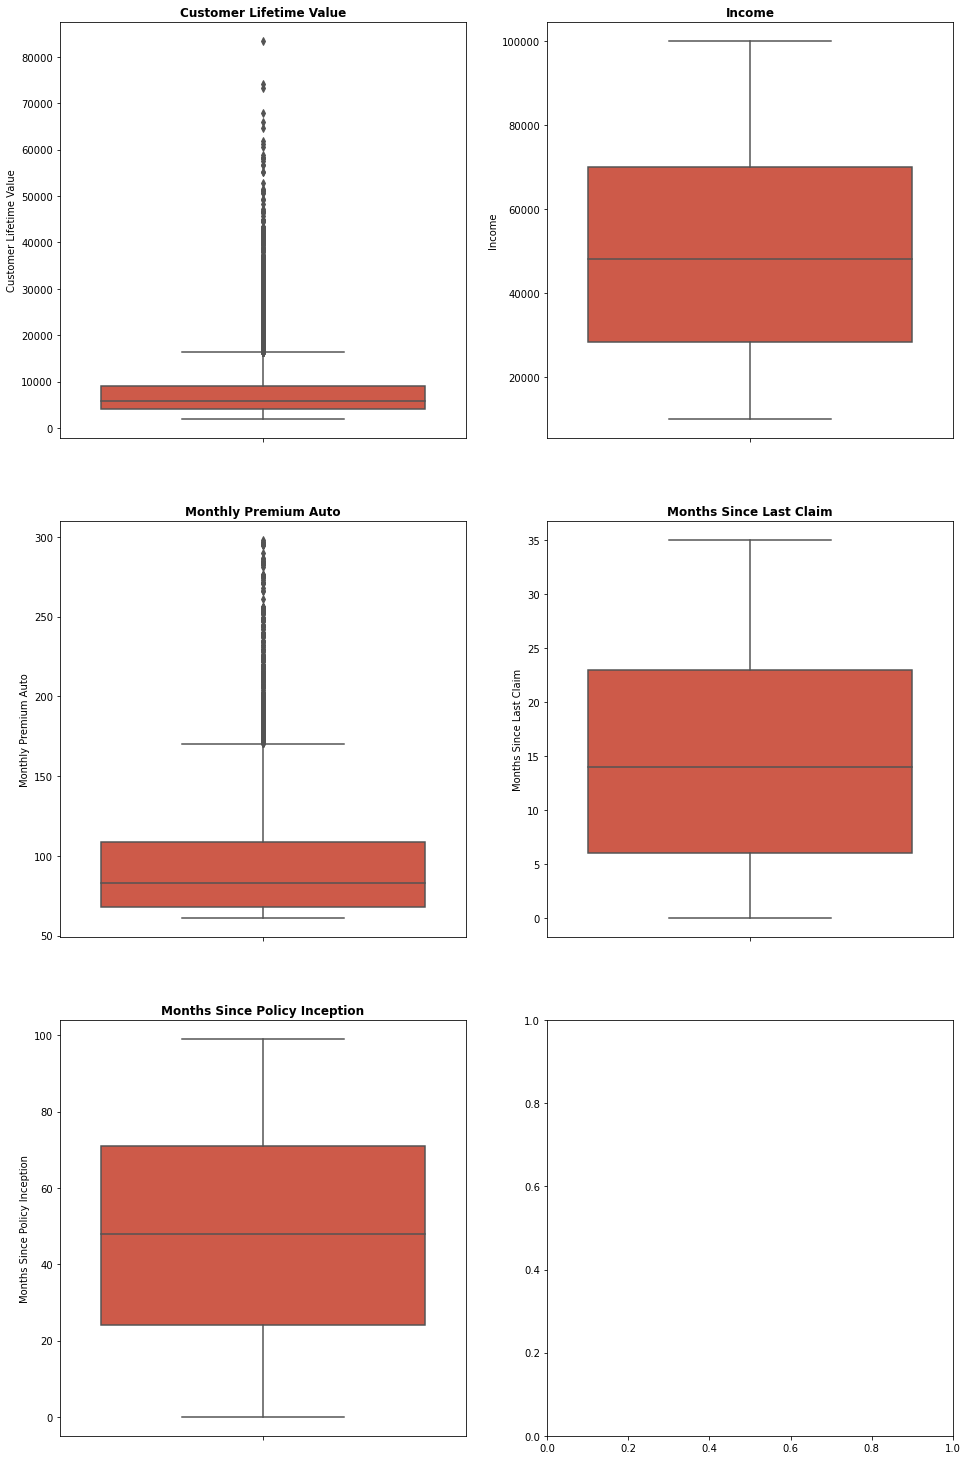

In [99]:
#checkign for outliers
fig2, ax2 = plt.subplots(3,2, figsize=(16,26))

sns.boxplot(y=dataframe['Customer Lifetime Value'], ax = ax2[0,0])
ax2[0,0].set_title('Customer Lifetime Value', fontweight='bold')

sns.boxplot(y=dataframe['Income'], ax = ax2[0,1])
ax2[0,1].set_title('Income', fontweight='bold')

sns.boxplot(y=dataframe['Monthly Premium Auto'], ax = ax2[1,0])
ax2[1,0].set_title('Monthly Premium Auto', fontweight='bold')

sns.boxplot(y=dataframe['Months Since Last Claim'], ax = ax2[1,1])
ax2[1,1].set_title('Months Since Last Claim', fontweight='bold')

sns.boxplot(y=dataframe['Months Since Policy Inception'], ax = ax2[2,0])

ax2[2,0].set_title('Months Since Policy Inception', fontweight='bold')

In [100]:
#preparing to drop outliers from customer lifetime value
mean_clv = np.mean(dataframe['Customer Lifetime Value'])
std_clv = np.std(dataframe['Customer Lifetime Value'])

threshold = 3
outliers_clv = []
for i in dataframe['Customer Lifetime Value']:
    z = (i-mean_clv)/std_clv
    if z > threshold:
        outliers_clv.append(i)
print(outliers_clv)

[74228.52, 32474.77, 35862.99, 34611.38, 46805.22, 34039.06, 33473.35, 32654.84, 42561.63, 41787.9, 34708.87, 33279.77, 34611.38, 31162.69, 30763.26, 38545.71, 38055.21, 32450.39, 36293.15, 36860.73, 31864.86, 33473.35, 42561.63, 29091.24, 35022.45, 30205.01, 73225.96, 58207.13, 39561.08, 30118.66, 37939.49, 41787.9, 32104.7, 43290.5, 32871.75, 30286.69, 57520.5, 36695.91, 33718.84, 30061.69, 35227.3, 36632.53, 30442.54, 30081.37, 46770.95, 51426.25, 40132.01, 37111.66, 32098.32, 31758.35, 34611.38, 32269.85, 58166.55, 37150.83, 33451.79, 33473.35, 36229.41, 29412.29, 31803.31, 34611.38, 31269.27, 34931.0, 31516.51, 35013.54, 34090.04, 34931.0, 31706.93, 41745.01, 39400.19, 36057.54, 28799.95, 61134.68, 44856.11, 45708.65, 33473.35, 32777.3, 41787.9, 41787.9, 35203.57, 28685.83, 35850.6, 32269.85, 38887.9, 46302.08, 32227.08, 33279.77, 46611.87, 50568.26, 35537.85, 41075.43, 30141.62, 33473.35, 44856.11, 33873.18, 29328.04, 56675.94, 37243.63, 38230.21, 35984.1, 30850.59, 38496.95, 288

In [101]:
#drop
dataframe = dataframe[dataframe['Customer Lifetime Value'].isin(outliers_clv) == False]

Text(0.5, 1.0, 'Months Since Policy Inception')

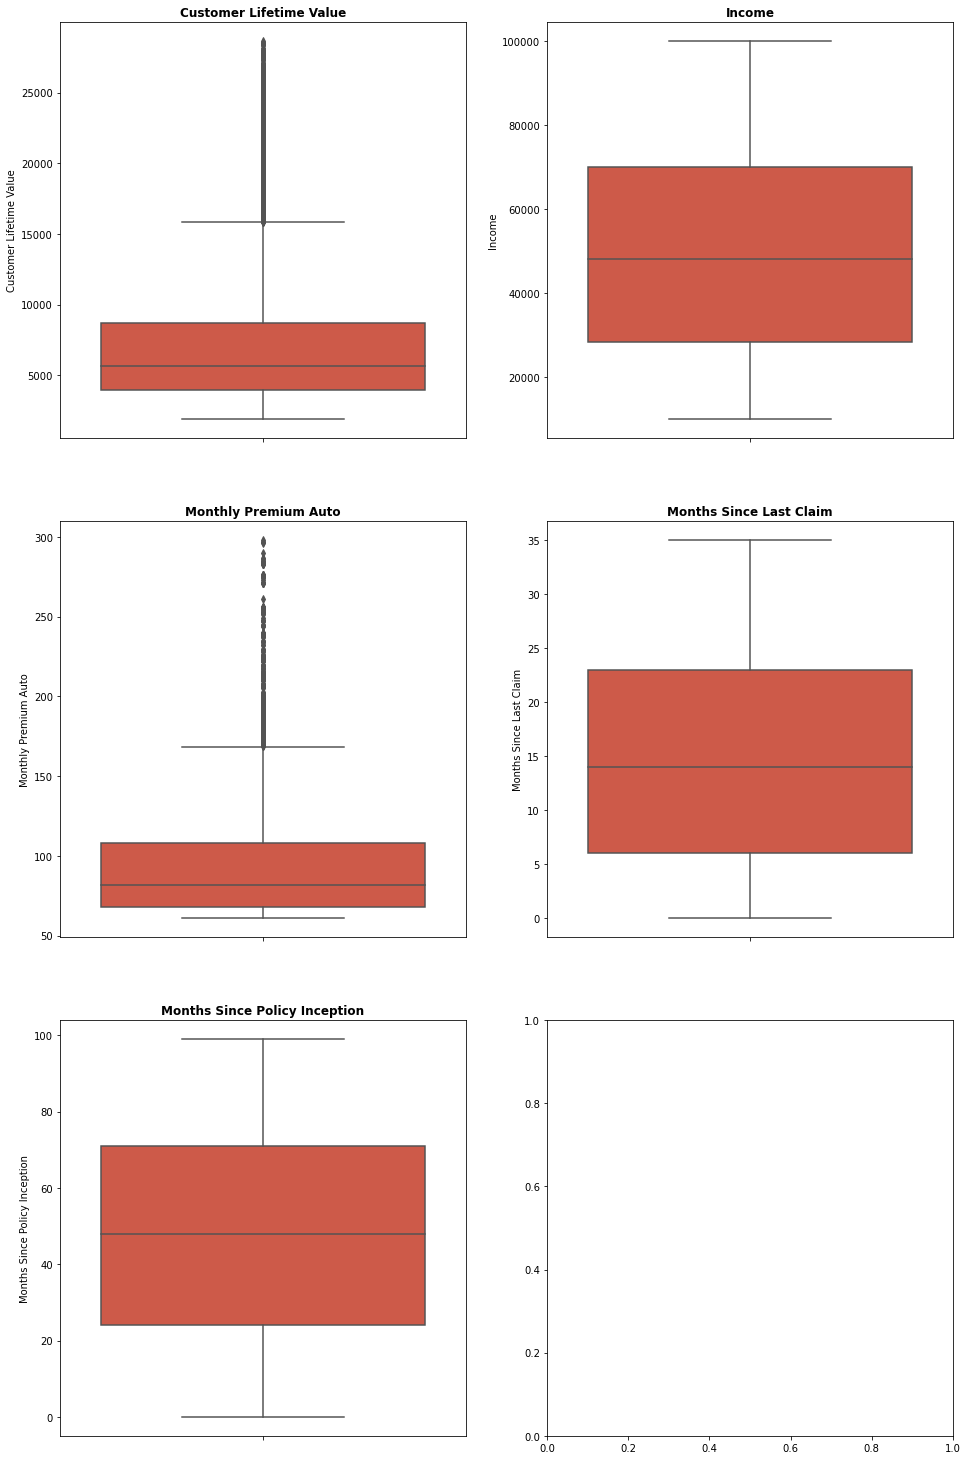

In [102]:
#checkign for outliers
fig2, ax2 = plt.subplots(3,2, figsize=(16,26))

sns.boxplot(y=dataframe['Customer Lifetime Value'], ax = ax2[0,0])
ax2[0,0].set_title('Customer Lifetime Value', fontweight='bold')

sns.boxplot(y=dataframe['Income'], ax = ax2[0,1])
ax2[0,1].set_title('Income', fontweight='bold')

sns.boxplot(y=dataframe['Monthly Premium Auto'], ax = ax2[1,0])
ax2[1,0].set_title('Monthly Premium Auto', fontweight='bold')

sns.boxplot(y=dataframe['Months Since Last Claim'], ax = ax2[1,1])
ax2[1,1].set_title('Months Since Last Claim', fontweight='bold')

sns.boxplot(y=dataframe['Months Since Policy Inception'], ax = ax2[2,0])

ax2[2,0].set_title('Months Since Policy Inception', fontweight='bold')

In [103]:
dataframe.select_dtypes(include=np.number)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Date
0,4809.22,48029.0,61,7.0,52,0.0,9,292.80,2
1,2228.53,NaN,64,3.0,26,0.0,1,744.92,1
2,14947.92,22139.0,100,34.0,31,0.0,2,480.00,2
3,22332.44,49078.0,97,10.0,3,0.0,2,484.01,1
4,9025.07,23675.0,117,NaN,31,NaN,7,707.93,1
...,...,...,...,...,...,...,...,...,...
10905,15563.37,NaN,253,NaN,40,NaN,7,1214.40,1
10906,5259.44,61146.0,65,7.0,68,0.0,6,273.02,1
10907,23893.30,39837.0,201,11.0,63,0.0,2,381.31,2
10908,11971.98,64195.0,158,0.0,27,4.0,6,618.29,2


In [143]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10619 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       10619 non-null  object 
 1   State                          10014 non-null  object 
 2   Customer Lifetime Value        10619 non-null  float64
 3   Response                       10014 non-null  object 
 4   Coverage                       10619 non-null  object 
 5   Education                      10619 non-null  object 
 6   Effective To Date              10619 non-null  object 
 7   EmploymentStatus               10619 non-null  object 
 8   Gender                         10619 non-null  object 
 9   Income                         7894 non-null   float64
 10  Location Code                  10619 non-null  object 
 11  Marital Status                 10619 non-null  object 
 12  Monthly Premium Auto           10619 non-null 

In [144]:
dataframe.drop_duplicates(inplace=True)
dataframe

C:\Users\Seinf\Anaconda3\envs\DAenv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Date
0,DK49336,Arizona,4809.22,No,Basic,College,2/18/11,Employed,M,48029.0,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.80,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.53,No,Basic,College,1/18/11,Unemployed,F,NaN,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.92,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.92,No,Basic,Bachelor,2/10/11,Employed,M,22139.0,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.00,SUV,Medsize,A,2
3,XL78013,Oregon,22332.44,Yes,Extended,College,1/11/11,Employed,M,49078.0,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.01,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.07,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675.0,...,7,Personal Auto,Personal L2,Offer1,Branch,707.93,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.37,No,Premium,Bachelor,1/19/11,Unemployed,F,NaN,...,7,Personal Auto,Personal L1,Offer3,Web,1214.40,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.44,No,Basic,College,1/6/11,Employed,F,61146.0,...,6,Personal Auto,Personal L3,Offer2,Branch,273.02,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.30,No,Extended,Bachelor,2/6/11,Employed,F,39837.0,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.31,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.98,No,Premium,College,2/13/11,Employed,F,64195.0,...,6,Personal Auto,Personal L1,Offer1,Branch,618.29,SUV,Medsize,A,2


In [183]:
dataframe.dropna(inplace=True)

In [184]:
print(nan_counter(dataframe))

{'Customer': 0, 'State': 0, 'Customer Lifetime Value': 0, 'Response': 0, 'Coverage': 0, 'Education': 0, 'Effective To Date': 0, 'EmploymentStatus': 0, 'Gender': 0, 'Income': 0, 'Location Code': 0, 'Marital Status': 0, 'Monthly Premium Auto': 0, 'Months Since Last Claim': 0, 'Months Since Policy Inception': 0, 'Number of Open Complaints': 0, 'Number of Policies': 0, 'Policy Type': 0, 'Policy': 0, 'Renew Offer Type': 0, 'Sales Channel': 0, 'Total Claim Amount': 0, 'Vehicle Class': 0, 'Vehicle Size': 0, 'Vehicle Type': 0, 'Date': 0}


<h2>X/y Split</h2>

In [146]:
X =dataframe.drop('Total Claim Amount', axis=1)
Y =dataframe['Total Claim Amount'] #target variable

In [147]:
# Split X to numeric and categorical for transformation

X_numeric = X._get_numeric_data()

In [148]:
X_numeric.drop(columns=['Number of Open Complaints','Number of Policies', 'Date'], inplace=True)


In [149]:
X_categ = X.select_dtypes(np.object)

C:\Users\Seinf\AppData\Local\Temp/ipykernel_10348/1164684901.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_categ = X.select_dtypes(np.object)


In [150]:
X_categ

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [151]:
X_categ['Number of Open Complaints'] = dataframe['Number of Open Complaints']
X_categ['Number of Policies'] = dataframe['Number of Policies']

C:\Users\Seinf\AppData\Local\Temp/ipykernel_10348/1990860372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categ['Number of Open Complaints'] = dataframe['Number of Open Complaints']
C:\Users\Seinf\AppData\Local\Temp/ipykernel_10348/1990860372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categ['Number of Policies'] = dataframe['Number of Policies']


In [152]:
X_numeric

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception
0,4809.22,48029.0,61,7.0,52
1,2228.53,NaN,64,3.0,26
2,14947.92,22139.0,100,34.0,31
3,22332.44,49078.0,97,10.0,3
4,9025.07,23675.0,117,NaN,31
...,...,...,...,...,...
10905,15563.37,NaN,253,NaN,40
10906,5259.44,61146.0,65,7.0,68
10907,23893.30,39837.0,201,11.0,63
10908,11971.98,64195.0,158,0.0,27


In [153]:
print(zero_counter(X_numeric))

Customer Lifetime Value            0
Income                             0
Monthly Premium Auto               0
Months Since Last Claim          338
Months Since Policy Inception    105
dtype: int64


<h2> Cleaning Categoricals </h2>

In [154]:
X_categ


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type,Number of Open Complaints,Number of Policies
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN,0.0,9
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN,0.0,1
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,0.0,2
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,0.0,2
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A,NaN,7
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,0.0,6
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN,0.0,2
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A,4.0,6


In [155]:
X_categ.drop('Customer', axis=1, inplace=True)

C:\Users\Seinf\Anaconda3\envs\DAenv\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [156]:
X_categ=pd.get_dummies(X_categ, drop_first=True)
X_categ

,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0.0,2,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0.0,2,0,0,1,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
4,NaN,7,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,NaN,7,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
10906,0.0,6,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
10907,0.0,2,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
10908,4.0,6,1,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0


In [157]:
X = pd.concat([X_categ,X_numeric], axis=1)

In [158]:
X_categ['Number of Open Complaints'].value_counts() #CHECK THIS ONE!

0.0    7947
1.0    1117
2.0     400
3.0     314
4.0     166
5.0      67
Name: Number of Open Complaints, dtype: int64

In [159]:
X

,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,...,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception
0,0.0,9,0,0,0,0,0,0,0,1,...,0,0,0,1,0,4809.22,48029.0,61,7.0,52
1,0.0,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,2228.53,NaN,64,3.0,26
2,0.0,2,0,0,0,1,0,0,0,0,...,1,0,0,1,0,14947.92,22139.0,100,34.0,31
3,0.0,2,0,0,1,0,1,1,0,1,...,0,0,0,1,0,22332.44,49078.0,97,10.0,3
4,NaN,7,0,0,1,0,0,0,1,0,...,0,0,0,1,0,9025.07,23675.0,117,NaN,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,NaN,7,0,1,0,0,0,0,1,0,...,0,0,0,1,0,15563.37,NaN,253,NaN,40
10906,0.0,6,0,0,1,0,0,0,0,1,...,0,0,0,1,0,5259.44,61146.0,65,7.0,68
10907,0.0,2,0,0,0,0,0,1,0,0,...,0,0,0,1,0,23893.30,39837.0,201,11.0,63
10908,4.0,6,1,0,0,0,0,0,1,1,...,1,0,0,1,0,11971.98,64195.0,158,0.0,27


<h2> Transformation </h2>

In [160]:
# qt = QuantileTransformer(output_distribution="normal")
# income_transformed = qt.fit_transform(X_numeric['Income'].to_numpy().reshape(-1,1))
# sns.displot(income_transformed)

In [161]:
# X_numeric["income_transformed"]= income_transformed
# X_numeric.drop(["Income"],axis=1,inplace=True)

In [162]:
# bc = PowerTransformer(method='box-cox')
# cust_lifetime_val_transformed = bc.fit_transform(X_numeric['Customer Lifetime Value'].to_numpy().reshape(-1,1))
# sns.displot(cust_lifetime_val_transformed)

In [163]:
# X_numeric["cust_lifetime_val_transformed"]= cust_lifetime_val_transformed
# X_numeric.drop(["Customer Lifetime Value"],axis=1,inplace=True)

In [164]:
# qt = QuantileTransformer(output_distribution="normal")
# month_prem_auto_transformed = qt.fit_transform(X_numeric['Monthly Premium Auto'].to_numpy().reshape(-1,1))
# sns.displot(month_prem_auto_transformed)

In [165]:
# X_numeric["month_prem_auto_transformed"]= month_prem_auto_transformed
# X_numeric.drop(["Monthly Premium Auto"],axis=1,inplace=True)

In [166]:
# qt = QuantileTransformer(output_distribution="normal")
# months_since_last_claim_transformed = qt.fit_transform(X_numeric['Months Since Last Claim'].to_numpy().reshape(-1,1))
# sns.displot(months_since_last_claim_transformed)

In [167]:
# X_numeric["months_since_last_claim_transformed"]= months_since_last_claim_transformed
# X_numeric.drop(["Months Since Last Claim"],axis=1,inplace=True)

In [168]:
# pt = QuantileTransformer(output_distribution="normal")
# months_since_policy_incept_transformed=pt.fit_transform(dataframe['Months Since Policy Inception'].to_numpy().reshape(-1,1))
# sns.displot(months_since_policy_incept_transformed)

In [169]:
# X_numeric["months_since_policy_incept_transformed"] = months_since_policy_incept_transformed


In [170]:
# X_numeric.drop(["Months Since Policy Inception"],axis=1,inplace=True)


In [171]:
# X_numeric.hist(figsize=(14,14))

In [172]:
#Datasplitting

In [173]:
X_train, X_test, y_train, y_test=train_test_split(X_numeric, Y, test_size=.30,random_state=123)

In [174]:
#standartizing

In [175]:
std_scaler=StandardScaler().fit(X_train)   

X_train_scaled=std_scaler.transform(X_train)

In [176]:
X_test_scaled=std_scaler.transform(X_test)

In [177]:
print(X_train_scaled)



[[-0.36493798  0.07359581 -0.71784362 -0.4004075   1.32518363]
 [ 0.25396711         nan -0.33057686 -0.89582911  0.033585  ]
 [ 0.27466253  0.49734182  0.50353616  0.78860436 -0.10992596]
 ...
 [ 1.3530474   1.3000026   0.68227466 -0.49949183  0.24885144]
 [-0.7749634  -0.82422792 -0.1220486  -0.00407022  1.00228397]
 [-1.01501181 -1.58429078 -0.83700262  1.68036326  0.42824014]]


<h2> Model </h2>

In [185]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

MissingDataError: exog contains inf or nans

In [186]:
predictions_test

NameError: name 'predictions_test' is not defined

In [ ]:
print(model.rsquared_adj)

<h2> Modeling using Scikit </h2>

In [ ]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
y_pred=model.predict(X_test_scaled)   # model prediction

#y_pred_train=model.predict(X_train_scaled)

In [ ]:
model.score(X_test_scaled, y_test)

In [ ]:
y_pred=model.predict(X_test_scaled) #predict numerical + categorical ------------------------>>>>>>>>> error

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
y_pred_train=model.predict(X_train_scaled)

In [ ]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [ ]:
result

In [ ]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [ ]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [ ]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

In [ ]:
##prediction on the train set
mse(y_train,y_pred_train)

In [ ]:
R2=r2_score(y_test,y_pred)
R2

In [ ]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [ ]:
X_test.shape[1]

In [ ]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

In [ ]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [ ]:
features_importances

In [ ]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X

In [ ]:
X.State_California.unique()

In [ ]:
sns.displot(X['Number of Open Complaints'])

In [ ]:
sns.displot(X['Customer Lifetime Value'])